## *Exercise 3 - Music Genre Classification*

Συγγραφή: Χρήστος Νίκου

Αριθμός Μητρώου: 1115201800330

### Task 1 (Feed Forward Neural Network)

#### Step 1 (Dataloading of MFCCs)

We first begin by preparing the dataloading part for the MFCCs. For this purpose we create a utility `load_mfccs` function located in `utils.py`. The function takes as argument the type of the dataset to load which is either train, test or val. It returns the features of the corresponding dataset as well as the labels for the given dataset. Each one of the labels "classical", "pop", "rock", and "blues" are mapped to the integers 0, 1, 2, and 3, respectively. Furthermore, we create a Pytorch dataset object that inherits from `torch.utils.data.Dataset` in order to feed the data to our Neural Network. The class is defined in `utils.py` under the name `VectorDataset`.

In [1]:
import numpy as np
import torch

from utils import load_mfccs, VectorDataset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.metrics import ConfusionMatrixDisplay

Using the function `load_mfccs` we load the dataset of the mfccs corresponding for the training set.

In [2]:
X, y = load_mfccs('train')

In [3]:
print(X.shape, y.shape)
print(X.dtype)

(3200, 26) (3200,)
float32


We check the distribution of the classes for the training set.

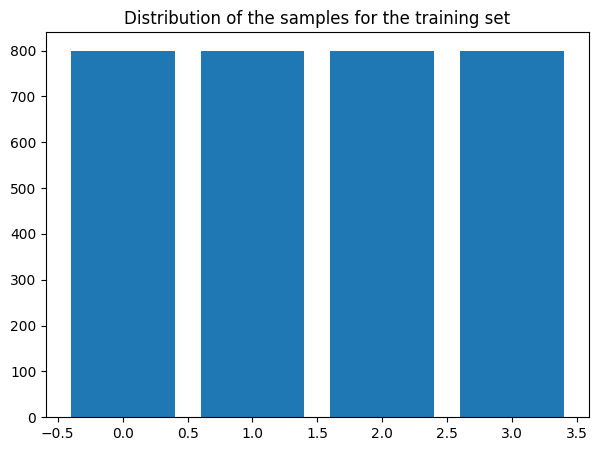

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(4), np.bincount(y))
ax.set_title('Distribution of the samples for the training set')
plt.show()

As we can see the dataset is balanced since each class on the training set contains exactly 800 samples. Below we define the three dataloaders that will be used for training, one for the training set, one for the validation and one for the test set.

In [5]:
X_train, y_train = load_mfccs(mode='train')
X_val, y_val = load_mfccs(mode='val')
X_test, y_test = load_mfccs(mode='test')

train_dloader = DataLoader(VectorDataset(X_train, y_train), batch_size=16, shuffle=True)
val_dloader = DataLoader(VectorDataset(X_val, y_val), batch_size=16, shuffle=True)
test_dloader = DataLoader(VectorDataset(X_test, y_test), batch_size=16, shuffle=False)

#### Step 2 (Defining a Fully connected Neural Network)

In the second step we define the first type of Neural Network that we will use to train and classify the samples using the features with the MFCCs. The first architecture is a Fully Connected Neural Network with 4 layers each one of them consisting of 26, 128, 32 and 4 neurons, respectively. The number 26 corresponds to the number of input features and the 4 is the number of classes (classical, hiphop, blues, rock_metal_hardrock). The architecture is located in `models.py` under the name `MLP`. Below you can see the architecture of this Neural Network.

In [6]:
from models import MLP

In [7]:
model = MLP()
model

MLP(
  (body): ModuleList(
    (0): Linear(in_features=26, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=4, bias=True)
  )
)

#### Step 3 & 4 (Training loop & Validation loop)

In this step we create a custom function, named `training_loop` to handle the training of the Neural Network. The arguments of the function are the number of epochs, the optimizer to be used for training, the two dataloaders corresponding to the training/val sets, and the loss function to be used. The function is in `utils.py`.

Furthermore, we design a validation loop through the function `validation_loop` located in `utils.py`. The arguments of the function is the trained model, the test_dloader, and the loss function corresponding to the test samples. The function returns 

- (i) The average loss across all samples
- (ii) The average f1 macro
- (iii) The accuracy, and
- (iv) The confusion matrix corresponding to the classification.

#### Step 5 (Training the Feed Forward Neural Network)

In this step we train the Feed Forward Neural Network defined in Step 2. We use the utility function `training_loop` and we measure the training time on the CPU. Below we also define the number of epochs, the optimizer, the loss function and the learning rate to be used for training. Furthermore, we use the `validation_loop` to test the model's performance on the test set.

In [8]:
from torch.optim import SGD

In [9]:
EPOCHS = 30
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optim = SGD(model.parameters(), lr=learning_rate)

In [10]:
from utils import training_loop, validation_loop

Epoch 1 /30. Train Loss: 1.388. Val Loss: 1.368


Epoch 2 /30. Train Loss: 1.369. Val Loss: 1.356


Epoch 3 /30. Train Loss: 1.358. Val Loss: 1.349


Epoch 4 /30. Train Loss: 1.344. Val Loss: 1.335


Epoch 5 /30. Train Loss: 1.330. Val Loss: 1.322


Epoch 6 /30. Train Loss: 1.319. Val Loss: 1.309


Epoch 7 /30. Train Loss: 1.307. Val Loss: 1.300


Epoch 8 /30. Train Loss: 1.292. Val Loss: 1.282


Epoch 9 /30. Train Loss: 1.277. Val Loss: 1.272


Epoch 10/30. Train Loss: 1.265. Val Loss: 1.255


Epoch 11/30. Train Loss: 1.250. Val Loss: 1.239


Epoch 12/30. Train Loss: 1.236. Val Loss: 1.225


Epoch 13/30. Train Loss: 1.218. Val Loss: 1.215


Epoch 14/30. Train Loss: 1.204. Val Loss: 1.196


Epoch 15/30. Train Loss: 1.188. Val Loss: 1.178


Epoch 16/30. Train Loss: 1.174. Val Loss: 1.169


Epoch 17/30. Train Loss: 1.159. Val Loss: 1.162


Epoch 18/30. Train Loss: 1.145. Val Loss: 1.136


Epoch 19/30. Train Loss: 1.129. Val Loss: 1.123


Epoch 20/30. Train Loss: 1.117. Val Loss: 1.101


Epoch 21/30. Train Loss: 1.102. Val Loss: 1.086


Epoch 22/30. Train Loss: 1.089. Val Loss: 1.076


Epoch 23/30. Train Loss: 1.080. Val Loss: 1.058


Epoch 24/30. Train Loss: 1.064. Val Loss: 1.053


Epoch 25/30. Train Loss: 1.058. Val Loss: 1.038


Epoch 26/30. Train Loss: 1.042. Val Loss: 1.058


Epoch 27/30. Train Loss: 1.036. Val Loss: 1.020


Epoch 28/30. Train Loss: 1.026. Val Loss: 1.004


Epoch 29/30. Train Loss: 1.017. Val Loss: 0.999


Epoch 30/30. Train Loss: 1.009. Val Loss: 0.986

- Total training time: 7.22 (secs)


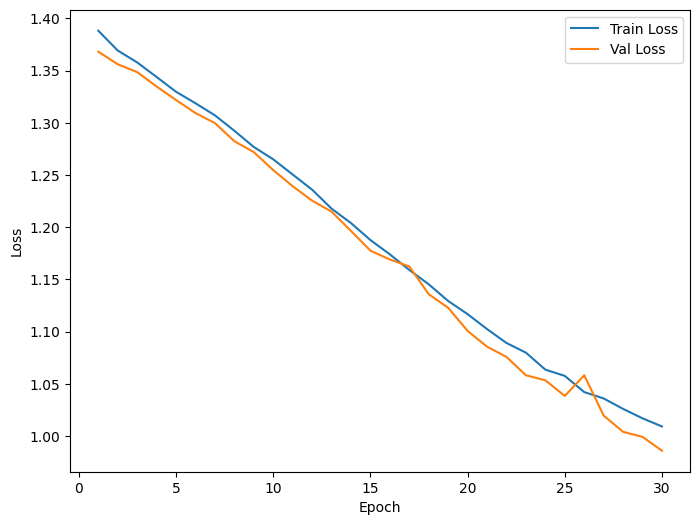

In [11]:
training_loop(EPOCHS, model, train_dloader, val_dloader, optim, loss_fn)

In [12]:
loss, f1, acc, cm = validation_loop(model, test_dloader, loss_fn)

100%|██████████| 86/86 [00:00<00:00, 2280.95it/s]


In [13]:
print(f'Total loss: {loss:.3f}\nF1 score: {f1:.3f}\nAccuracy: {acc:.3f}')

Total loss: 1.005
F1 score: 0.550
Accuracy: 0.608


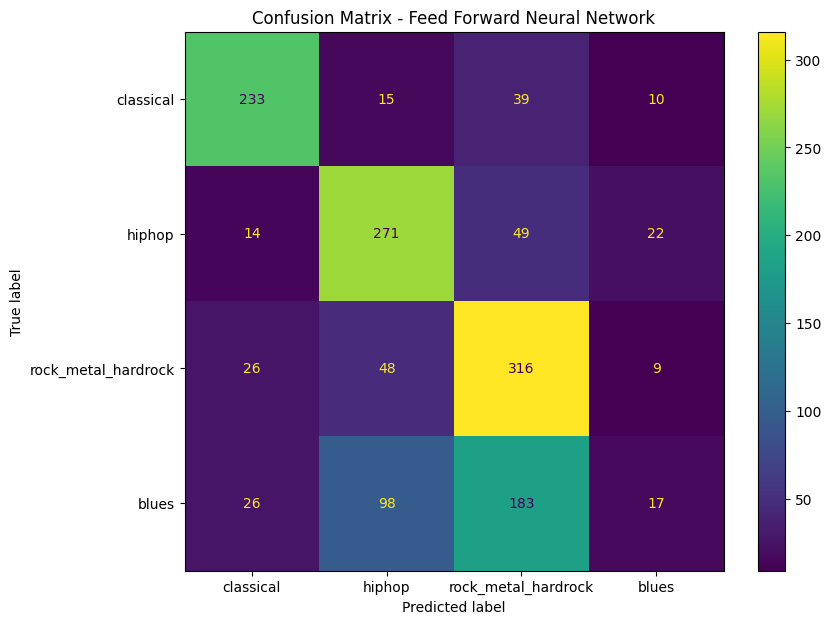

In [14]:
fig, ax = plt.subplots(figsize = (9, 7))
img = ConfusionMatrixDisplay(cm, display_labels=['classical', 'hiphop', 'rock_metal_hardrock', 'blues'])
img.plot(ax=ax)
ax.set_title('Confusion Matrix - Feed Forward Neural Network')
plt.show()

#### Step 6 (Training on GPU)

Now, we move the model on the GPU and we perform the same training as before and measure the time difference.

In [15]:
# Check if gpu is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
print(torch.cuda.get_device_name())

cuda
NVIDIA GeForce GTX 1050


In [16]:
model = MLP()
model = model.to(device)
loss_fn = loss_fn.to(device)
optim = SGD(model.parameters(), lr=learning_rate)

Epoch 1 /30. Train Loss: 1.390. Val Loss: 1.373


Epoch 2 /30. Train Loss: 1.366. Val Loss: 1.354


Epoch 3 /30. Train Loss: 1.354. Val Loss: 1.345


Epoch 4 /30. Train Loss: 1.343. Val Loss: 1.344


Epoch 5 /30. Train Loss: 1.332. Val Loss: 1.320


Epoch 6 /30. Train Loss: 1.321. Val Loss: 1.310


Epoch 7 /30. Train Loss: 1.307. Val Loss: 1.297


Epoch 8 /30. Train Loss: 1.292. Val Loss: 1.287


Epoch 9 /30. Train Loss: 1.282. Val Loss: 1.281


Epoch 10/30. Train Loss: 1.268. Val Loss: 1.261


Epoch 11/30. Train Loss: 1.256. Val Loss: 1.245


Epoch 12/30. Train Loss: 1.240. Val Loss: 1.230


Epoch 13/30. Train Loss: 1.223. Val Loss: 1.214


Epoch 14/30. Train Loss: 1.211. Val Loss: 1.197


Epoch 15/30. Train Loss: 1.194. Val Loss: 1.184


Epoch 16/30. Train Loss: 1.180. Val Loss: 1.183


Epoch 17/30. Train Loss: 1.165. Val Loss: 1.156


Epoch 18/30. Train Loss: 1.147. Val Loss: 1.137


Epoch 19/30. Train Loss: 1.135. Val Loss: 1.144


Epoch 20/30. Train Loss: 1.121. Val Loss: 1.107


Epoch 21/30. Train Loss: 1.109. Val Loss: 1.094


Epoch 22/30. Train Loss: 1.095. Val Loss: 1.090


Epoch 23/30. Train Loss: 1.083. Val Loss: 1.075


Epoch 24/30. Train Loss: 1.071. Val Loss: 1.056


Epoch 25/30. Train Loss: 1.058. Val Loss: 1.047


Epoch 26/30. Train Loss: 1.049. Val Loss: 1.047


Epoch 27/30. Train Loss: 1.039. Val Loss: 1.031


Epoch 28/30. Train Loss: 1.032. Val Loss: 1.009


Epoch 29/30. Train Loss: 1.020. Val Loss: 0.995


Epoch 30/30. Train Loss: 1.012. Val Loss: 0.995

- Total training time: 12.82 (secs)


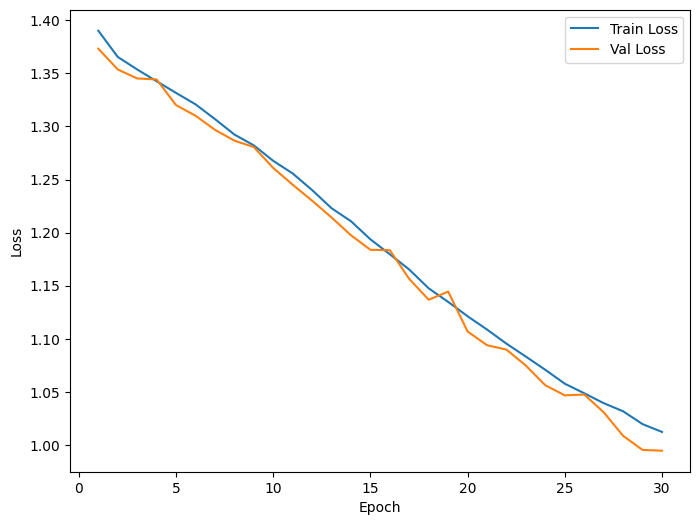

In [17]:
training_loop(
    epochs=EPOCHS,
    model=model,
    train_dloader=train_dloader,
    val_dloader=val_dloader,
    optim=optim,
    loss_fn=loss_fn,
    device=device
)


#### Step 7 (Choosing the best model)

In this step we train again the Feed Forward Neural Network and keep the model with the highest f1 score on the validation set. To implement this on code we add a boolean flag `keep_best` on the `training_loop`. When this flag is set to True then the model with the lowest f1 score on the validation set is stored in a `.pt` file. Below we see the results of this model too.

In [18]:
model = MLP()
optim = SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

Epoch 1 /30. Train Loss: 1.391. Val Loss: 1.383


Epoch 2 /30. Train Loss: 1.383. Val Loss: 1.371


Epoch 3 /30. Train Loss: 1.373. Val Loss: 1.368


Epoch 4 /30. Train Loss: 1.364. Val Loss: 1.362


Epoch 5 /30. Train Loss: 1.354. Val Loss: 1.348


Epoch 6 /30. Train Loss: 1.348. Val Loss: 1.343


Epoch 7 /30. Train Loss: 1.338. Val Loss: 1.329


Epoch 8 /30. Train Loss: 1.328. Val Loss: 1.321


Epoch 9 /30. Train Loss: 1.318. Val Loss: 1.310


Epoch 10/30. Train Loss: 1.310. Val Loss: 1.304


Epoch 11/30. Train Loss: 1.300. Val Loss: 1.288


Epoch 12/30. Train Loss: 1.287. Val Loss: 1.277


Epoch 13/30. Train Loss: 1.279. Val Loss: 1.267


Epoch 14/30. Train Loss: 1.264. Val Loss: 1.254


Epoch 15/30. Train Loss: 1.253. Val Loss: 1.240


Epoch 16/30. Train Loss: 1.241. Val Loss: 1.233


Epoch 17/30. Train Loss: 1.229. Val Loss: 1.222


Epoch 18/30. Train Loss: 1.214. Val Loss: 1.206


Epoch 19/30. Train Loss: 1.201. Val Loss: 1.193


Epoch 20/30. Train Loss: 1.187. Val Loss: 1.184


Epoch 21/30. Train Loss: 1.173. Val Loss: 1.165


Epoch 22/30. Train Loss: 1.162. Val Loss: 1.142


Epoch 23/30. Train Loss: 1.147. Val Loss: 1.128


Epoch 24/30. Train Loss: 1.133. Val Loss: 1.125


Epoch 25/30. Train Loss: 1.120. Val Loss: 1.100


Epoch 26/30. Train Loss: 1.107. Val Loss: 1.109


Epoch 27/30. Train Loss: 1.097. Val Loss: 1.077


Epoch 28/30. Train Loss: 1.082. Val Loss: 1.069


Epoch 29/30. Train Loss: 1.072. Val Loss: 1.045


Epoch 30/30. Train Loss: 1.061. Val Loss: 1.032

- Total training time: 7.31 (secs)
- Best F1 score: 0.598820949370318 on epoch 30


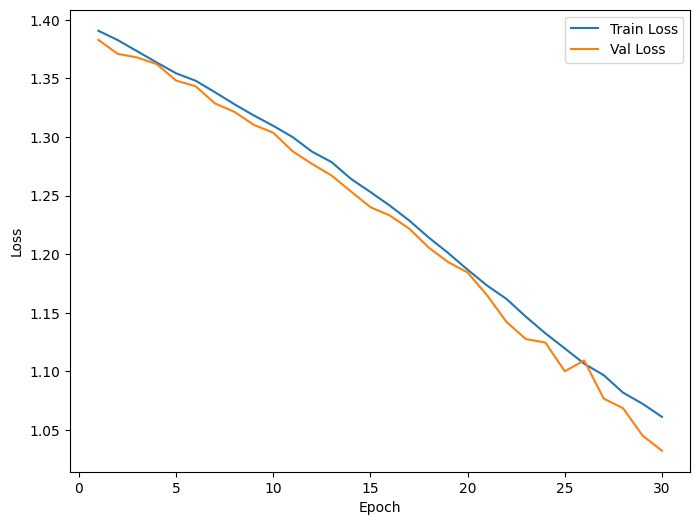

In [19]:
training_loop(
    epochs=EPOCHS,
    model=model,
    train_dloader=train_dloader,
    val_dloader=val_dloader,
    optim=optim,
    loss_fn=loss_fn,
    device='cpu',
    keep_best=True
)


In [21]:
# Validating the best model
model = MLP()
model.load_state_dict(torch.load('model.pt', map_location=torch.device('cpu')))
loss, f1, acc, cm = validation_loop(model, test_dloader, loss_fn)

100%|██████████| 86/86 [00:00<00:00, 1458.60it/s]

-Total Loss: 1.049434
- F1 score: 0.586
- Accuracy: 0.626


In [22]:
print(f'-Total Loss: {loss:3f}\n- F1 score: {f1:.3f}\n- Accuracy: {acc:.3f}')

-Total Loss: 1.049434
- F1 score: 0.586
- Accuracy: 0.626


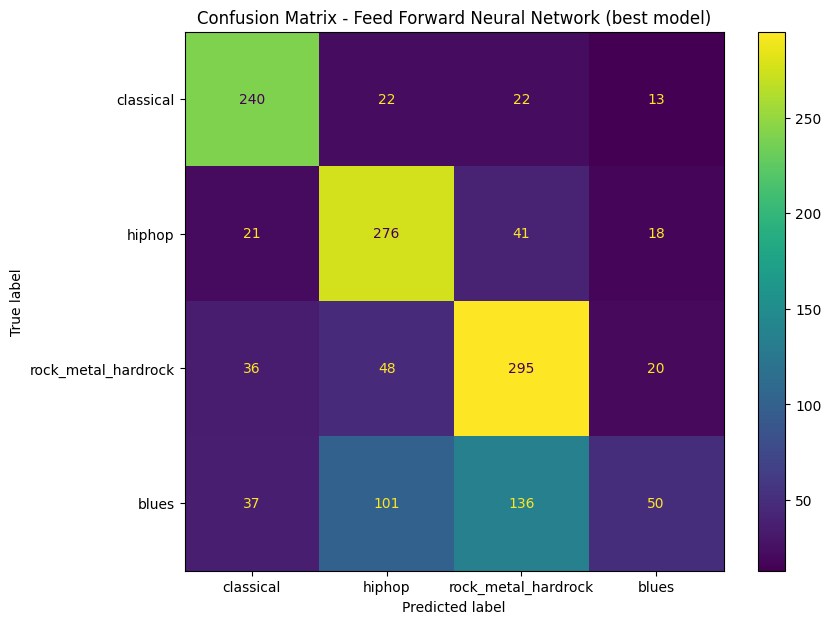

In [23]:
fig, ax = plt.subplots(figsize = (9, 7))
img = ConfusionMatrixDisplay(cm, display_labels=['classical', 'hiphop', 'rock_metal_hardrock', 'blues'])
img.plot(ax=ax)
ax.set_title('Confusion Matrix - Feed Forward Neural Network (best model)')
plt.show()